# Домашнее задание «Элементарные методы анализа временных рядов»

Задание

Взять из прошлого домашнего задания ряд (в двух вариантах - стационарный и нет) и приблизить оба эти варианта моделями из класса MA. Оценить качество и прислать соображения почему была выбрана та или иная модель

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
mean_monthly_temp = pd.read_csv(
    "..\Series\mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv(
    "..\Series\weekly-closings-of-the-dowjones-.csv")


In [5]:
all_series = {
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"]
}


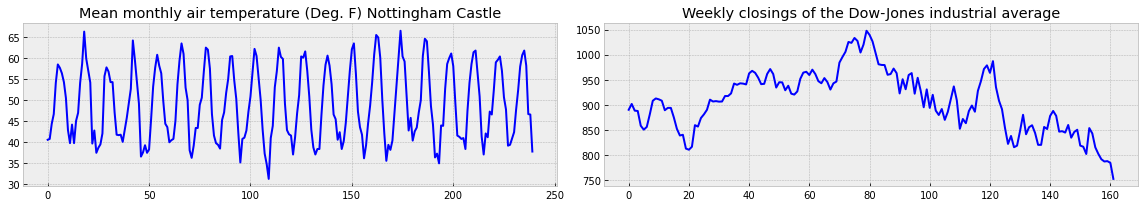

In [6]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()


### Для датасета mean_monthly_temp используем скользящее среднее, что позволит определить тренд

In [13]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()


In [14]:
def predict(series, N, n_pred):
    new_series = series.copy()
    for _ in range(n_pred):
        new_series = new_series.append(
            pd.Series([new_series[-N:].mean()]), ignore_index=True)
    return new_series


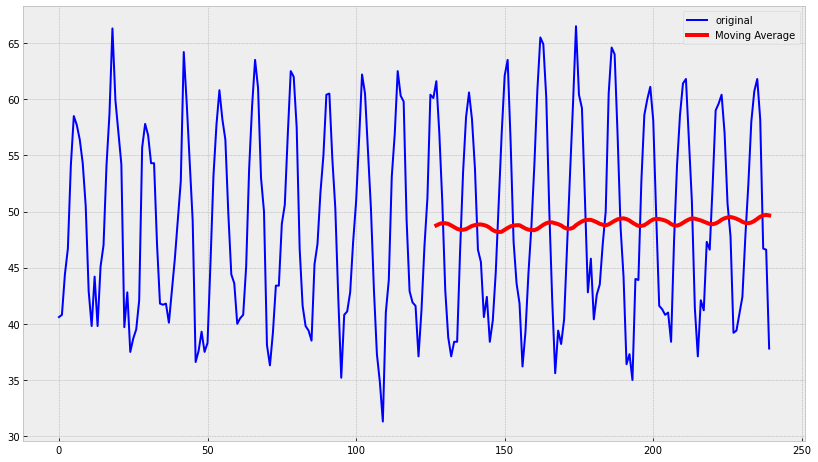

In [11]:
ser = moving_average(mean_monthly_temp["Deg"], 128)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(mean_monthly_temp["Deg"], color='blue', label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()


In [8]:
mean_monthly_temp_pred = predict(mean_monthly_temp["Deg"], 7, 50)


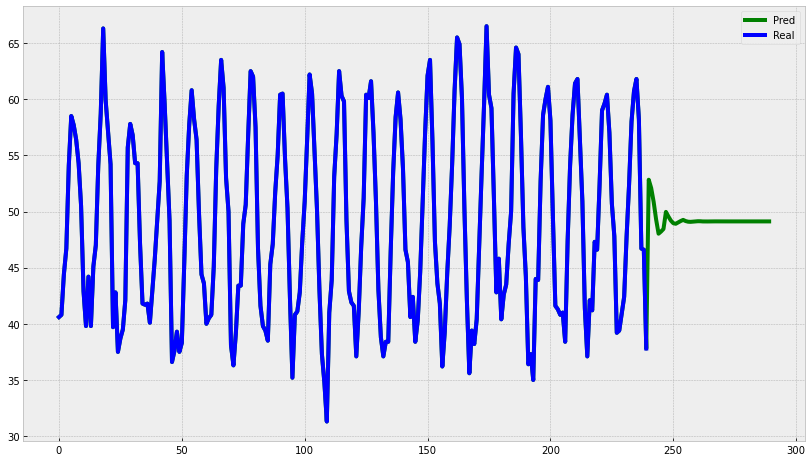

In [9]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(mean_monthly_temp_pred, color='green',
             linewidth='4', label='Pred')
    plt.plot(mean_monthly_temp["Deg"],
             color='blue', linewidth='4', label='Real')
    plt.legend()


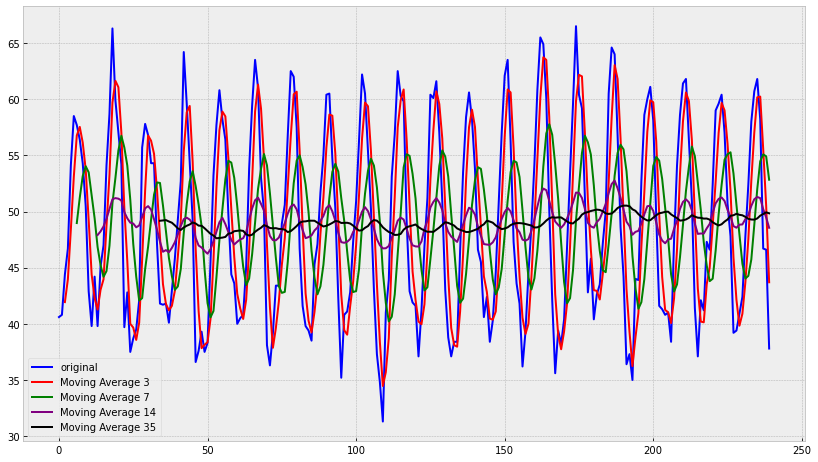

In [10]:
windows = [3, 7, 14, 35]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(mean_monthly_temp["Deg"], color='blue', label='original')
    for i in range(len(windows)):
        ser = moving_average(mean_monthly_temp["Deg"], windows[i])
        plt.plot(ser, color=colors[i], linewidth='2',
                 label='Moving Average {}'.format(windows[i]))
    plt.legend()


### Для датасета dowjones_closing применим экспоненциальное сглаживание, это позволит учитывать всю историю измерений, накопившуюся к текущему моменту.

In [15]:
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)


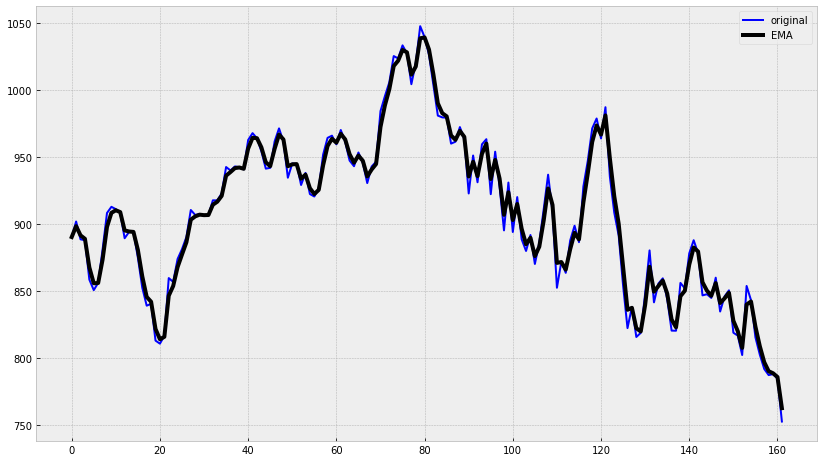

In [19]:
ema = exponential_moving_average(dowjones_closing["Close"], 0.7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(dowjones_closing["Close"], color='blue', label='original')
    plt.plot(ema, color='black', linewidth='4', label='EMA')
    plt.legend()
